**Predicting the Amount of People Using Bike-Share on a Given Day**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bike sharing and rental systems have been introduced across many urban areas over the past few decades, and have had many benefits to urban transportation, such as by providing convenient, eco-friendly, and cost-effective mobility solutions. With the growing emphasis on sustainable transportation, bike sharing has gained significant popularity as a means to reduce traffic, lower carbon emissions, and promote healthier lifestyles.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Through our data analysis project, we would like to figure out the amount of people using bike rental systems on a given day, with respect to temperature. Thus, our question is the following: *What is the relationship between daily temperature and the number of people using bike rental systems, and can we predict the number of users based on this temperature data?* We will be using the Seoul Bike Sharing Demand dataset, which contains the count of public bicycles rented per hour within the Seoul Bike Sharing System, in addition to the corresponding weather data and holiday information.


In [3]:
library(tidyverse)
install.packages("janitor") # for clean_names
library(janitor)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
also installing the dependency ‘snakecase’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 8760 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Date, Seasons, Holiday, Functioning Day
dbl (10): Rented Bike Count, Hour, Temperature_Celsius, Humidity, Wind speed...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 8,760
Columns: 14
$ date                          <chr> "01/12/2017", "01/12/2017", "01/12/2017"…
$ rented_bike_count             <dbl> 254, 204, 173, 107, 78, 100, 181, 460, 9…
$ hour                          <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…
$ temperature_celsius           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6…
$ humidity                      <dbl> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, …
$ wind_speed_m_per_s            <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, …
$ visibility_10m                <dbl> 2000, 2000, 2000, 2000, 2000, 2000, 2000…
$ dew_point_temperature_celsius <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7…
$ solar_radiation               <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ rainfall_mm                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ snowfall_cm                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ seasons                       <chr> "Winter", "Winter", "Winter", "Winter", …
$ holiday       

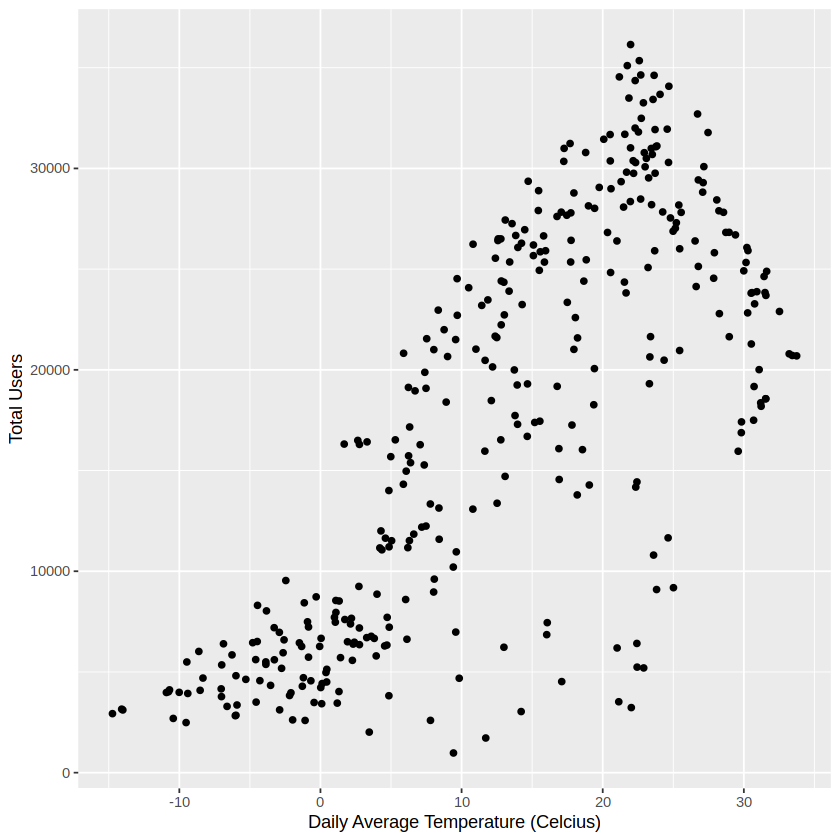

In [10]:
bike_data <- read_csv("SeoulBikeData.csv") |>
    clean_names() 

bike_condensed <- bike_data |>
    group_by(date) |>
    filter(functioning_day == "Yes") |>
    summarize(avg_temp = mean(temperature_celsius), total_users = sum(rented_bike_count))

glimpse(bike_data)

plot <- ggplot(bike_condensed, aes(x = avg_temp, y = total_users)) +
    geom_point() +
    xlab("Daily Average Temperature (Celcius)") +
    ylab("Total Users")
plot

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Since this is a regression problem about the relationship between the amount of bike share users and the temperature, we would like to examine only these two variables. We chose temperature in particular since we believe that it is the most informational variable regarding the amount of bike rental system users, as it can cause significant variances depending on day. In addition, since this dataset recorded data at several points throughout the day, and we are only interested in finding out the daily counts, we grouped the temperature by day and took the average. Furthermore, we can then visualize our results with the use of a scatter plot, as it will show the correlations between our variables well. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We expect that the amount of bike share users will be lower towards the higher and lower ends of the temperature spectrum, and will be the highest near the middle at a milder, warmer temperature. Thus, through the process of regression, we will be able to predict the amount of bike share users for a given day with a particular average temperature. Understanding this information can have many positive impacts on the progression of bike sharing systems, such as with allocating resources. For instance, cities or bike-sharing operators will be able to deploy additional bikes or staff during peak demand on mild, warmer days and reduce resources during colder periods or extreme heat, which will help optimize operations and reduce costs.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Moreover, this data analysis can also pose some future questions, such as how to improve the bike-sharing industry and system through our results, as well as with more specific ways to determine bike rental patterns. For example, our analysis could be the basis for the following questions: How do bike rental patterns change with the seasons? Are there significant differences in temperature-related usage between summer and winter? How does bike rental usage respond to extreme temperature conditions, such as heat waves or cold snaps? Are there temperature thresholds that significantly affect usage?